# Python Measures

We tried to run centrality measures on a subset of vertices while keeping the network intact. This parameter did not work in `R`, so we tried to implement this in `Python` instead. The scores ended up being the same as without the subset of vertices. 

We also included some random analytics (counts/means) that are included in the paper.

In [1]:
import igraph

In [2]:
import math
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from collections import Counter

In [5]:
df_meta = pd.read_csv('masha_and_shark_2019_05_14_metadata.csv')
df_meta.sort_values(by=['viewCount INT'],ascending=False)

,Unnamed: 0,nodeid,label,isSeed VARCHAR,seedRank INT,publishedAt INT,channelTitle VARCHAR,channelId VARCHAR,videoCategoryLabel VARCHAR,viewCount INT,likeCount INT,dislikeCount INT,dislikeLikeRatio FLOAT,favoriteCount INT,commentCount INT,label_clean,title_language,url,seed_channel
0,0,KYniUCGPGLs,Маша и Медведь (Masha and The Bear) - Маша плю...,yes,1.0,1328013326,Get Movies,UClZkHt2kNIgyrTTPnSQV3SA,Entertainment,3572394626,4511814.0,2450208.0,0.543065,0,27170.0,Маша и Медведь (Masha and The Bear) - Маша плю...,bg,https://www.youtube.com/watch?v=KYniUCGPGLs,True
1,1,XqZsoesa55w,Baby Shark Dance | Sing and Dance! | Animal So...,yes,2.0,1466204430,Pinkfong! Kids Songs & Stories,UCcdwLMPsaU2ezNSJU1nFoBQ,Education,2762274288,7161771.0,2567562.0,0.358509,0,NaN,Baby Shark Dance | Sing and Dance! | Animal So...,en,https://www.youtube.com/watch?v=XqZsoesa55w,True
14,14,HP-MbfHFUqs,Wheels On The Bus | Nursery Rhymes for Babies ...,no,NaN,1407571466,Little Baby Bum - Nursery Rhymes & Kids Songs,UCKAqou7V9FAWXpZd9xtOg3Q,Education,2197880542,NaN,NaN,NaN,0,6861.0,Wheels On The Bus | Nursery Rhymes for Babies ...,en,https://www.youtube.com/watch?v=HP-MbfHFUqs,False
19,19,F4tHL8reNCs,Johny Johny Yes Papa 👶 THE BEST Song for Child...,no,NaN,1475910395,LooLoo Kids - Nursery Rhymes and Children s Songs,UC4NALVCmcmL5ntpV0thoH6w,Music,1777153865,3739877.0,2193269.0,0.586455,0,77352.0,Johny Johny Yes Papa 👶 The Best Song for Child...,en,https://www.youtube.com/watch?v=F4tHL8reNCs,False
128,128,kHSFpGBFGHY,Johny Johny Yes Papa and Many More Videos | Po...,no,NaN,1415979996,ChuChu TV Nursery Rhymes & Kids Songs,UCBnZ16ahKA2DZ_T5W0FPUXg,Education,1639936949,NaN,NaN,NaN,0,NaN,Johny Johny Yes Papa and Many More Videos | Po...,en,https://www.youtube.com/watch?v=kHSFpGBFGHY,False
2,2,x1fe8-Qli9E,Маша и Медведь (Masha and The Bear) - Приятног...,no,NaN,1348230424,Get Movies,UClZkHt2kNIgyrTTPnSQV3SA,Entertainment,1236260225,1418208.0,755111.0,0.532440,0,9374.0,Маша и Медведь (Masha and The Bear) - Приятног...,ru,https://www.youtube.com/watch?v=x1fe8-Qli9E,True
16,16,lS_ubz6Sa9c,Маша и Медведь (Masha and The Bear) - Большая ...,no,NaN,1328012994,Get Movies,UClZkHt2kNIgyrTTPnSQV3SA,Entertainment,1083480127,1215541.0,669775.0,0.551010,0,9404.0,Маша и Медведь (Masha and The Bear) - Большая ...,ru,https://www.youtube.com/watch?v=lS_ubz6Sa9c,True
17,17,CvKgP6Ei-U8,Surprise Eggs Nursery Rhymes | Old MacDonald H...,no,NaN,1442904091,ChuChu TV Nursery Rhymes & Kids Songs,UCBnZ16ahKA2DZ_T5W0FPUXg,Education,1060386608,1568440.0,1049513.0,0.669145,0,18558.0,Surprise Eggs Nursery Rhymes | Old MacDonald H...,en,https://www.youtube.com/watch?v=CvKgP6Ei-U8,False
21,21,YJyNoFkud6g,Finger Family Collection - 7 Finger Family Son...,no,NaN,1383155098,Videogyan 3D Rhymes - Nursery Rhymes & Kids Songs,UCs0upBDG-dCAxy8_VDPE5XA,Education,994817302,NaN,NaN,NaN,0,55931.0,Finger Family Collection - 7 Finger Family Son...,en,https://www.youtube.com/watch?v=YJyNoFkud6g,False
199,199,z1gFMujtH-o,Pollito Amarillito ORIGINAL - Gallina Pintadit...,no,NaN,1312999357,Gallina Pintadita,UCKdEsgHiM0SulsFXm7QMJAg,Film & Animation,968156370,1196657.0,685533.0,0.572873,0,25907.0,Pollito Amarillito Original - Gallina Pintadit...,it,https://www.youtube.com/watch?v=z1gFMujtH-o,False


In [6]:
df_meta = pd.read_csv('annotated_videonet_seeds_elsa_spiderman_2019_08_18_metadata.csv')
df_rels = pd.read_csv('videonet_seeds_elsa_spiderman_2019_08_18_relations.csv')

In [7]:
df_meta

,Unnamed: 0,nodeid,label,isSeed VARCHAR,seedRank INT,publishedAt INT,channelTitle VARCHAR,channelId VARCHAR,videoCategoryLabel VARCHAR,viewCount INT,...,favoriteCount INT,commentCount INT,label_clean,title_language,url,seed_channel,is_inappropriate,is_live_streaming,annotator,Comments
0,0,Ut9iby5VChA,spider man and elsa have a new baby,yes,1.0,1503406880,wai bom,UCir-ay37PYv8-lQOk_dxzFA,People & Blogs,2406035,...,0,268.0,spider man and elsa have a new baby,en,https://www.youtube.com/watch?v=Ut9iby5VChA,True,YES,NO,JS,NaN
1,1,3ZdXn-uYz7I,Elsa Anna And Olaf In The Pool Frozen,yes,2.0,1484845230,Mathias Jost,UC96vy6lHoIKWSevWJEC47xA,People & Blogs,1763,...,0,5.0,Elsa Anna And Olaf In The Pool Frozen,en,https://www.youtube.com/watch?v=3ZdXn-uYz7I,True,YES,NO,MTO,Pregnancy
2,2,G_qx2ZeHJ4o,ละครหรรษา เอลซ่าคลอดลูก เเฝงข้อคิด l พี่อีฟ ข้...,no,NaN,1491475843,Eve My Tube,UC0xH3QQdLAIu7srkkbTG8CQ,Entertainment,7016116,...,0,675.0,ละครหรรษา เอลซ่าคลอดลูก เเฝงข้อคิด l พี่อีฟ ข้...,th,https://www.youtube.com/watch?v=G_qx2ZeHJ4o,False,YES,NO,MTO,Pregnancy
3,3,7nw-QA_-ED8,This is Your Pregnancy in 2 Minutes | Glamour,no,NaN,1502205344,Glamour,UCY9eEaH19ulZmdusctU1ejA,Entertainment,43156098,...,0,7579.0,This is Your Pregnancy in 2 Minutes | Glamour,en,https://www.youtube.com/watch?v=7nw-QA_-ED8,False,NO,NO,MTO,Pregnancy
4,4,Jy2dTbOGTBE,The Deli Show - הריון,no,NaN,1427363679,Post Hostel,UCD4MbghmkGS3aF5ymsc8_bw,People & Blogs,7880193,...,0,53.0,The Deli Show - הריון,en,https://www.youtube.com/watch?v=Jy2dTbOGTBE,False,NO,NO,MTO,Pregnancy
5,5,CQ_C9KeeEbk,LA PETITE SIRENE LowCost (Alex Ramirès),no,NaN,1531326601,Alex Ramirès,UCp_CBY2rEWs_CPI3HaC6tbg,Comedy,47904738,...,0,2507.0,La Petite Sirene LowCost (Alex Ramirès),fr,https://www.youtube.com/watch?v=CQ_C9KeeEbk,False,NO,NO,MTO,Guy acting out the little mermaid
6,6,ZgkkJjKpDvw,Engendros TV: Nuevellizos.,no,NaN,1233984252,ClubEngendros,UCN6rjYMkYv5eUAHbFwDbQmg,Comedy,19302563,...,0,604.0,Engendros Tv: Nuevellizos.,es,https://www.youtube.com/watch?v=ZgkkJjKpDvw,False,NO,NO,MTO,Pregnancy
7,7,_75wztsXeUo,Making Off | Ensaio de JUNHO | LadyBug e Cat Noir,no,NaN,1499533412,Way to Hero,UCRBhx25KHV4wUhKsO29BNgw,People & Blogs,575243,...,0,30.0,Making Off | Ensaio de Junho | LadyBug e Cat Noir,en,https://www.youtube.com/watch?v=_75wztsXeUo,False,YES,NO,MTO,People in costumes almost having sex
8,8,BBm_5LSedM4,Oh Baby Baby! Romantic Date is Over! AMAZING D...,no,NaN,1552641301,Crafty Panda DIY,UCYDKUHScAVoI_UTVuA7ThcQ,Howto & Style,3635903,...,0,113.0,Oh Baby Baby! Romantic Date is Over! Amazing D...,en,https://www.youtube.com/watch?v=BBm_5LSedM4,False,YES,NO,MTO,Pregnancy and smoking
9,9,eJqszZw6F6I,McDonalds Drive Thru Prank!! Batman Payback Ti...,no,NaN,1500423727,CKN Toys,UCfaZw8XH_zmAVkBst_MPD6w,Entertainment,126942725,...,0,NaN,McDonalds Drive Thru Prank!! Batman Payback Ti...,en,https://www.youtube.com/watch?v=eJqszZw6F6I,False,NO,NO,MTO,Child batman and grown up spiderman eating McD


In [8]:
# Average view counts for inappropriate vs. cf videos
df_meta.groupby('is_inappropriate').mean()['viewCount INT']

is_inappropriate
NO     5.644255e+07
YES    9.104412e+06
Name: viewCount INT, dtype: float64

In [9]:
df_meta.groupby('is_inappropriate').median()['viewCount INT']

is_inappropriate
NO     19302563
YES     3262029
Name: viewCount INT, dtype: int64

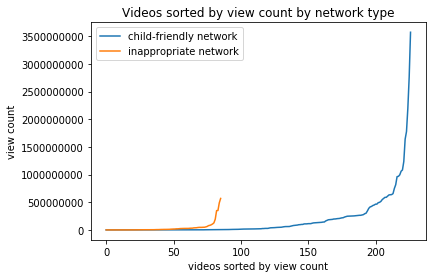

In [10]:
df_meta_good =  pd.read_csv('masha_and_shark_2019_05_14_metadata.csv')
plt.plot(list(df_meta_good['viewCount INT'].sort_values()))
plt.plot(list(df_meta['viewCount INT'].sort_values()))
plt.legend(['child-friendly network','inappropriate network'])
plt.xlabel('videos sorted by view count')
plt.ylabel('view count')
plt.ticklabel_format(style='plain')
plt.title('Videos sorted by view count by network type')
plt.show()

In [11]:
df_rels_no_seeds = df_rels.merge(df_meta[df_meta['isSeed VARCHAR'] == 'no'], right_on='label', left_on='node1')[['node1','node2','directed']]

In [12]:
tuples_no_seeds = [tuple(x[0:-1]) for x in df_rels_no_seeds.values]
tuples_no_seeds


[('SHE IS MY PREGNANT PRINCESS!!',
  'ละครหรรษา เอลซ่าคลอดลูก เเฝงข้อคิด l พี่อีฟ ข้าว เค้ก Eve My Tube'),
 ('SHE IS MY PREGNANT PRINCESS!!',
  'This is Your Pregnancy in 2 Minutes | Glamour'),
 ('SHE IS MY PREGNANT PRINCESS!!', 'THE SIMS 4 FROZEN ANNA BABY'),
 ('SHE IS MY PREGNANT PRINCESS!!',
  'Reborn Labour & Delivery 🤰🏻\U0001f931🏻👶🏻📦💕'),
 ('SHE IS MY PREGNANT PRINCESS!!', 'Girl gives birth in toilet'),
 ('SHE IS MY PREGNANT PRINCESS!!', 'spider man and elsa have a new baby'),
 ('Magician s baby does trick from INSIDE THE BELLY!',
  'ละครหรรษา เอลซ่าคลอดลูก เเฝงข้อคิด l พี่อีฟ ข้าว เค้ก Eve My Tube'),
 ('Magician s baby does trick from INSIDE THE BELLY!',
  'This is Your Pregnancy in 2 Minutes | Glamour'),
 ('Magician s baby does trick from INSIDE THE BELLY!',
  'Reborn Labour & Delivery 🤰🏻\U0001f931🏻👶🏻📦💕'),
 ('Magician s baby does trick from INSIDE THE BELLY!',
  'Girl gives birth in toilet'),
 ('The Deli Show - הריון', 'This is Your Pregnancy in 2 Minutes | Glamour'),
 ('The Deli

In [13]:
tuples = [tuple(x[1:-1]) for x in df_rels.values]
tuples

[('spider man and elsa have a new baby',
  'ละครหรรษา เอลซ่าคลอดลูก เเฝงข้อคิด l พี่อีฟ ข้าว เค้ก Eve My Tube'),
 ('SHE IS MY PREGNANT PRINCESS!!',
  'ละครหรรษา เอลซ่าคลอดลูก เเฝงข้อคิด l พี่อีฟ ข้าว เค้ก Eve My Tube'),
 ('Magician s baby does trick from INSIDE THE BELLY!',
  'ละครหรรษา เอลซ่าคลอดลูก เเฝงข้อคิด l พี่อีฟ ข้าว เค้ก Eve My Tube'),
 ('spider man and elsa have a new baby',
  'This is Your Pregnancy in 2 Minutes | Glamour'),
 ('The Deli Show - הריון', 'This is Your Pregnancy in 2 Minutes | Glamour'),
 ('Engendros TV: Nuevellizos.',
  'This is Your Pregnancy in 2 Minutes | Glamour'),
 ('Oh Baby Baby! Romantic Date is Over! AMAZING DIY HACKS LOVE and More Ideas',
  'This is Your Pregnancy in 2 Minutes | Glamour'),
 ('veggies & fruits I pregnancy time lapse',
  'This is Your Pregnancy in 2 Minutes | Glamour'),
 ('Pregnant Pink Spidergirl with Spiderman and The New Spiderbaby',
  'This is Your Pregnancy in 2 Minutes | Glamour'),
 ('PREPARING FOR BABY S ARRIVAL!',
  'This is Your

In [14]:
# map inappropriateness to relations and get counts of ties between annotation types
def count_relation_annotations(tuples):
    rels_inapprop = []
    for tup in tuples:
        node1, node2 = tup
        #print(df_meta[df_meta['label'] == node1].is_inappropriate)
        try:
            node1_in = df_meta[df_meta['label'] == node1].is_inappropriate.values[0]
            node2_in = df_meta[df_meta['label'] == node2].is_inappropriate.values[0]
            #print(node1_in, node2_in)
            rels_inapprop.append((node1_in, node2_in))
        except:
            pass
    return Counter(rels_inapprop)

count_relation_annotations(tuples)

Counter({('YES', 'YES'): 55,
         ('NO', 'YES'): 23,
         ('YES', 'NO'): 80,
         ('NO', 'NO'): 115})

In [15]:
count_relation_annotations(tuples_no_seeds)

Counter({('NO', 'YES'): 23,
         ('NO', 'NO'): 115,
         ('YES', 'NO'): 23,
         ('YES', 'YES'): 28})

In [16]:
g = igraph.Graph.TupleList(tuples, directed = True)
filtered_names = [x for x in g.vs['name'] if isinstance(x,str)]

In [17]:
vertex_names_df = pd.DataFrame(g.vs['name'], columns=['name'])

In [18]:
df_rels['node1_inapprop'] = df_meta.merge(df_rels, left_on='label', right_on='node1')['is_inappropriate']
df_rels['node2_inapprop'] = df_meta.merge(df_rels, left_on='label', right_on='node2')['is_inappropriate']
df_rels

,Unnamed: 0,node1,node2,directed,node1_inapprop,node2_inapprop
0,0,spider man and elsa have a new baby,ละครหรรษา เอลซ่าคลอดลูก เเฝงข้อคิด l พี่อีฟ ข้...,True,YES,YES
1,1,SHE IS MY PREGNANT PRINCESS!!,ละครหรรษา เอลซ่าคลอดลูก เเฝงข้อคิด l พี่อีฟ ข้...,True,YES,YES
2,2,Magician s baby does trick from INSIDE THE BELLY!,ละครหรรษา เอลซ่าคลอดลูก เเฝงข้อคิด l พี่อีฟ ข้...,True,YES,YES
3,3,spider man and elsa have a new baby,This is Your Pregnancy in 2 Minutes | Glamour,True,YES,YES
4,4,The Deli Show - הריון,This is Your Pregnancy in 2 Minutes | Glamour,True,YES,YES
5,5,Engendros TV: Nuevellizos.,This is Your Pregnancy in 2 Minutes | Glamour,True,YES,YES
6,6,Oh Baby Baby! Romantic Date is Over! AMAZING D...,This is Your Pregnancy in 2 Minutes | Glamour,True,YES,YES
7,7,veggies & fruits I pregnancy time lapse,This is Your Pregnancy in 2 Minutes | Glamour,True,YES,YES
8,8,Pregnant Pink Spidergirl with Spiderman and Th...,This is Your Pregnancy in 2 Minutes | Glamour,True,YES,NO
9,9,PREPARING FOR BABY S ARRIVAL!,This is Your Pregnancy in 2 Minutes | Glamour,True,YES,NO


In [19]:
g.vs['is_inappropriate'] = df_meta.merge(vertex_names_df, left_on='label', right_on='name')['is_inappropriate']
g.vs['is_seed'] = df_meta.merge(vertex_names_df, left_on='label', right_on='name')['isSeed VARCHAR']

In [20]:
not_seed_vertex_indices = g.vs.select(is_seed_eq='no').indices

In [21]:
not_seed_vertices = g.vs[not_seed_vertex_indices]
inappropriate_vertices = not_seed_vertices.select(is_inappropriate='YES')

In [22]:
# get names of inappropriate vertices for output
inappropriate_node_names = g.vs[inappropriate_vertices.indices]['name']

In [23]:
closeness_scores_inappropriate = igraph.Graph.closeness(g,vertices=inappropriate_vertices)
closeness_scores = igraph.Graph.closeness(g,)

In [24]:
all_scores = pd.DataFrame(
    {'video_name': g.vs['name'],
     'closeness': closeness_scores,
    })
all_scores.sort_values(by='closeness', ascending=False)

,video_name,closeness
0,spider man and elsa have a new baby,0.534161
48,Christmas ! Elsa and Anna toddlers - what happ...,0.472527
44,The Princess of Arendelle,0.441026
13,SNOW WHITE vs ELSA: Princess Rap Battle (Whitn...,0.427861
31,THE SIMS 3 FROZEN ANNA`S kids,0.427861
40,Mi corazón es tuyo--My heart is your (jack-els...,0.425743
23,JEDI ELSA vs SITH ELSA - Spider-Man Frozen Sta...,0.425743
77,Water Slide ! Elsa and Anna toddlers - pool pl...,0.423645
50,Vacation packing ! Elsa and Anna toddlers - sh...,0.421569
64,Moving Day ! Elsa and Anna toddlers are packing,0.419512


In [25]:
inappropriate_scores = pd.DataFrame(
    {'inappropriate_video_name': inappropriate_node_names,
     'closeness': closeness_scores_inappropriate,
    })
inappropriate_scores.sort_values(by='closeness', ascending=False)

,inappropriate_video_name,closeness
10,THE SIMS 3 FROZEN ANNA`S kids,0.427861
16,Vacation packing ! Elsa and Anna toddlers - sh...,0.421569
17,Elsa and Anna toddlers take swimming lessons f...,0.409524
15,Elsa and Anna toddlers slime in the pool,0.400000
11,baby factory scene,0.359833
0,SHE IS MY PREGNANT PRINCESS!!,0.358333
1,Oh Baby Baby! Romantic Date is Over! AMAZING D...,0.358333
5,Girl Spiderman vs. Captain America Battle - Su...,0.356846
14,Granny Out Drinks Football Team,0.355372
3,PREPARING FOR BABY S ARRIVAL!,0.353909
